Experimental devices are limited by finite bandwidth, with makes impossible the implementation of the ideal pulses obtained by $(\alpha,\beta)$ hypergeometries. To simulate the finite bandwidth, we filter the pulses using a Butterworth filter, removing high-frequency contributions.

After a third-order Butterworth filter, the Fourier transform of the pulse reads
$$
\tilde{z(\omega)} = \frac{z(\omega)}{\sqrt{1 + (\omega / \omega_c)^6}},
$$
with $\omega_c$ the cut-off frequency.

In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt

from HQUAD_lib.QUAD_utils import solve_LZ
from HQUAD_lib.parallel_utils import parameter_run
from HQUAD_lib.physics_utils import filter_pulse, fidelity_LZ

In [2]:
x = 1
alpha = 1
beta = 1

pulse = solve_LZ(alpha, beta, x=x)

In [3]:
boundary_left = np.ones(len(pulse) // 5) * -10
boundary_right = np.ones(len(pulse) // 5) * 10

pulse = np.concatenate((boundary_left, pulse, boundary_right))
s_total = np.linspace(0, 2, len(pulse))

time = np.linspace(0, 10, len(pulse))

order = 3
fc = 1
pulse_filtered = filter_pulse(pulse, time, order=order, fc=fc)

In [4]:
def compute_fidelity(pulse, tf, filtered = False):
    time = np.linspace(0, tf, len(pulse))

    if filtered:
        pulse = filter_pulse(pulse, time, order=order, fc=fc)

    return fidelity_LZ(-10, pulse, tf, x=x)

In [5]:
tfs = np.linspace(0.1, 100, 500)
filters = [False, True]

fidelities = [parameter_run(compute_fidelity, 'tf', tfs, pulse=pulse, filtered=filter_i) for filter_i in filters]

compute_fidelity: [['tf']]:   0%|          | 0/500 [00:00<?, ?it/s]

compute_fidelity: [['tf']]:   0%|          | 0/500 [00:00<?, ?it/s]

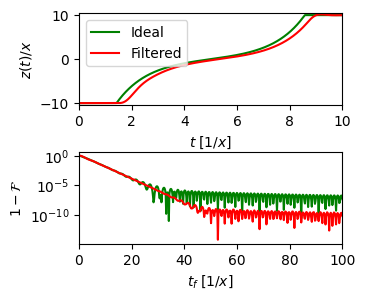

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(3.4, 3))

axs[0].plot(time, pulse, c='g', label='Ideal')
axs[0].plot(time, pulse_filtered, label='Filtered', c='r')
axs[0].legend()
axs[0].set_xlabel(r'$t \; [1 / x]$')
axs[0].set_ylabel(r'$z(t) / x$')
axs[0].set_xlim(min(time), max(time))
axs[0].set_ylim(-10.5, 10.5)

axs[1].plot(tfs, 1 - fidelities[0], c='g')
axs[1].plot(tfs, 1 - fidelities[1], c='r')

axs[1].set_yscale('log')
axs[1].set_xlim(0, max(tfs))
axs[1].set_xlabel(r'$t_f\; [1 / x]$')
axs[1].set_ylabel(r'$1 - \mathcal{F}$')

fig.subplots_adjust(hspace=0.5)